# Exercise 4.10 Task - Part 1

#### Table of Contents
#### 1. Importing the dataset
#### 2. Profiling the data based on certain customer attributes
#### 3. Creating visualizations to better understand the customer profiles
#### 4. Aggregating the max, mean and min on each customer profile for their
#### 5. Compare the customer profiles with visualizations, considering different regions and departments of goods. 

## 1. Importing the dataset

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Changing the decimal output 

pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
# Setting the default path

path = r'C:\Users\peter\Desktop\Career Foundry - Data Analyst\Data Immersion\Achievement 4 - Python\01. Instacart Basket Analysis - June 2023'

In [4]:
# Importing the 'high-activity' subset (which is actually quite large still)

df_merged2 = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'high_activity_customers.pkl'))

In [5]:
df_merged2.columns

Index(['user_id', 'sex', 'state', 'age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'order_id', 'eval_set', 'order_number',
       'order_dow', 'order_hour_of_day', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_spend',
       'spend_flag', 'median_days_since', 'order_behavior_flag', '_merge',
       'region', 'customer_activity'],
      dtype='object')

In [6]:
# Checking the import and dataframe

df_merged2

,user_id,sex,state,age,date_joined,n_dependants,fam_status,income,order_id,eval_set,...,busiest_period_of_day,max_order,loyalty_flag,mean_spend,spend_flag,median_days_since,order_behavior_flag,_merge,region,customer_activity
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,prior,...,Average orders,8,New customer,7.99,Low spender,19.00,Regular customer,both,Midwest,High-activity
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,prior,...,Most orders,8,New customer,7.99,Low spender,19.00,Regular customer,both,Midwest,High-activity
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,prior,...,Most orders,8,New customer,7.99,Low spender,19.00,Regular customer,both,Midwest,High-activity
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,prior,...,Average orders,8,New customer,7.99,Low spender,19.00,Regular customer,both,Midwest,High-activity
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,prior,...,Most orders,8,New customer,7.99,Low spender,19.00,Regular customer,both,Midwest,High-activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404813,135902,Female,Missouri,66,4/1/2020,2,married,53374,974951,prior,...,Average orders,8,New customer,6.96,Low spender,8.00,Frequent customer,both,Midwest,High-activity
32404814,135902,Female,Missouri,66,4/1/2020,2,married,53374,628984,prior,...,Most orders,8,New customer,6.96,Low spender,8.00,Frequent customer,both,Midwest,High-activity
32404815,135902,Female,Missouri,66,4/1/2020,2,married,53374,1157983,prior,...,Most orders,8,New customer,6.96,Low spender,8.00,Frequent customer,both,Midwest,High-activity
32404816,135902,Female,Missouri,66,4/1/2020,2,married,53374,2498530,prior,...,Average orders,8,New customer,6.96,Low spender,8.00,Frequent customer,both,Midwest,High-activity


## 2. Profiling the data for each customer based on the following variable: age, income and number of dependants. 

#### A new column flag called 'customer_profile' will be created based on the their age and number of dependents. We want to know
#### what their age is, how many dependents they have, and what their marital status is. These 3 factors from the 'age', 'n_dependents' and 'fam_status' columns will help create the profile. 

#### We will have the following age profiles: Young Adult, Adult, Senior
#### We will have the following dependent / family status profiles: Single, Married, Single Parent, Married Parent


#### Another column flag called 'income_profile' will be created based on their income level.

In [7]:
# Looking over the fam_status column to understand the variables

df_merged2['fam_status'].value_counts()

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: fam_status, dtype: int64

In [8]:
# Creating the 'customer_profile' column and flag

# Young Adults

df_merged2.loc[
    (df_merged2['age'] > 0) & 
    (df_merged2['age'] <= 25) & 
    (df_merged2['n_dependants'] == 0) & 
    (df_merged2['fam_status'].isin(['divorced/widowed', 'single', 'living with parents and siblings'])),
    'customer_profile'] = "Single Young Adult"
df_merged2.loc[
    (df_merged2['age'] > 0) & 
    (df_merged2['age'] <= 25) & 
    (df_merged2['n_dependants'] == 0) & 
    (df_merged2['fam_status'] == 'married'),
    'customer_profile'] = "Married Young Adult"
df_merged2.loc[
    (df_merged2['age'] > 0) & 
    (df_merged2['age'] <= 25) & 
    (df_merged2['n_dependants'] > 0) & 
    (df_merged2['fam_status'].isin(['divorced/widowed', 'single', 'living with parents and siblings'])),
    'customer_profile'] = "Single Young Adult Parent"
df_merged2.loc[
    (df_merged2['age'] > 0) & 
    (df_merged2['age'] <= 25) & 
    (df_merged2['n_dependants'] > 0) & 
    (df_merged2['fam_status'] == 'married'),
    'customer_profile'] = "Married Young Adult Parent"

# Adults

df_merged2.loc[
    (df_merged2['age'] > 25) & 
    (df_merged2['age'] <= 64) & 
    (df_merged2['n_dependants'] == 0) & 
    (df_merged2['fam_status'].isin(['divorced/widowed', 'single', 'living with parents and siblings'])),
    'customer_profile'] = "Single Adult"
df_merged2.loc[
    (df_merged2['age'] > 25) & 
    (df_merged2['age'] <= 64) & 
    (df_merged2['n_dependants'] == 0) & 
    (df_merged2['fam_status'] == 'married'),
    'customer_profile'] = "Married Adult"
df_merged2.loc[
    (df_merged2['age'] > 25) & 
    (df_merged2['age'] <= 64) & 
    (df_merged2['n_dependants'] > 0) & 
    (df_merged2['fam_status'].isin(['divorced/widowed', 'single', 'living with parents and siblings'])),
    'customer_profile'] = "Single Adult Parent"
df_merged2.loc[
    (df_merged2['age'] > 25) & 
    (df_merged2['age'] <= 64) & 
    (df_merged2['n_dependants'] > 0) & 
    (df_merged2['fam_status'] == 'married'),
    'customer_profile'] = "Married Adult Parent"

# Seniors

df_merged2.loc[
    (df_merged2['age'] >= 65) & 
    (df_merged2['n_dependants'] == 0) & 
    (df_merged2['fam_status'].isin(['divorced/widowed', 'single', 'living with parents and siblings'])),
    'customer_profile'] = "Single Senior"
df_merged2.loc[
    (df_merged2['age'] >= 65) & 
    (df_merged2['n_dependants'] == 0) & 
    (df_merged2['fam_status'] == 'married'),
    'customer_profile'] = "Married Senior"
df_merged2.loc[
    (df_merged2['age'] >= 65) & 
    (df_merged2['n_dependants'] > 0) & 
    (df_merged2['fam_status'].isin(['divorced/widowed', 'single', 'living with parents and siblings'])),
    'customer_profile'] = "Single Senior Parent"
df_merged2.loc[
    (df_merged2['age'] >= 65) & 
    (df_merged2['n_dependants'] > 0) & 
    (df_merged2['fam_status'] == 'married'),
    'customer_profile'] = "Married Senior Parent"

In [9]:
# Looking over the value_counts of the new customer_profile column 

df_merged2['customer_profile'].value_counts(dropna = False)

Married Adult Parent          14140006
Married Senior Parent          6173586
Single Adult                   4764496
Single Senior                  2021958
Single Young Adult Parent      1481172
Married Young Adult Parent     1430119
Single Young Adult              953227
Name: customer_profile, dtype: int64

In [10]:
# Creating the 'income_profile' column and flag

df_merged2.loc[
    (df_merged2['income'].between(0, 41775)),
    'income_profile'] = 'Low Income'
df_merged2.loc[
    (df_merged2['income'].between(41776, 89075)),
    'income_profile'] = 'Medium Income'
df_merged2.loc[
    (df_merged2['income'].between(89076, 170050)),
    'income_profile'] = 'High Income'
df_merged2.loc[
    (df_merged2['income'].between(170051, 215950)),
    'income_profile'] = 'Very High Income'
df_merged2.loc[
    (df_merged2['income'].between(215951, 539900)),
    'income_profile'] = 'Ruling Class'
df_merged2.loc[
    (df_merged2['income'].between(539901, 1000000)),
    'income_profile'] = 'Uber Wealthy Class'

In [11]:
# Looking over the value_counts for the new user_profile column 

df_merged2['income_profile'].value_counts(dropna = False)

High Income           17717166
Medium Income         11059194
Low Income             1872972
Ruling Class            220186
Very High Income         82891
Uber Wealthy Class       12155
Name: income_profile, dtype: int64

## 3. Creating visualizations to better understand the new profiles

In [12]:
# Creating a crosstab to compare the two new columns and their counts

crosstab = pd.crosstab(df_merged2['customer_profile'], df_merged2['income_profile'], dropna = False)

In [13]:
# Reviewing the new crosstab 

crosstab

income_profile,High Income,Low Income,Medium Income,Ruling Class,Uber Wealthy Class,Very High Income
customer_profile,,,,,,
Married Adult Parent,7845015,860798,5286332,104045,3676,40140
Married Senior Parent,4887620,309381,906536,51146,5309,13594
Married Young Adult Parent,273984,122128,1025893,5425,0,2689
Single Adult,2656030,297485,1762173,34623,2577,11608
Single Senior,1611564,91734,294899,17177,593,5991
Single Young Adult,168407,79132,699569,4993,0,1126
Single Young Adult Parent,274546,112314,1083792,2777,0,7743


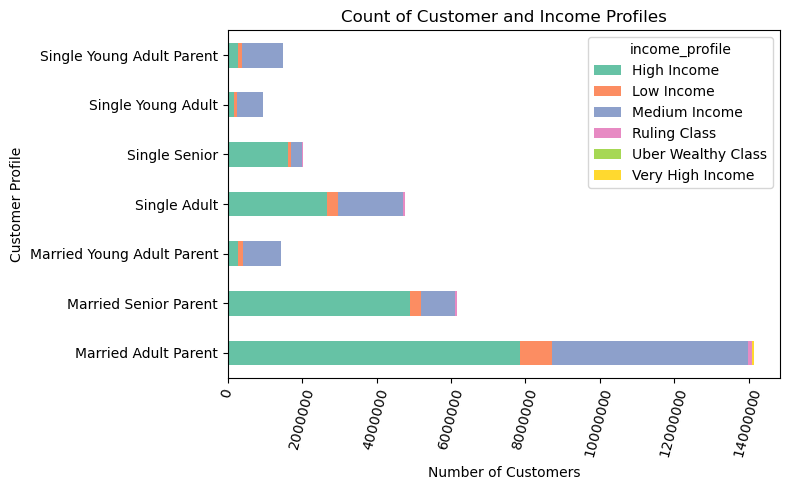

In [14]:
# Creating a histogram to better visualize the crosstab of the customer and income profiles

# Define a color palette with 7 different colors

colors = sns.color_palette("Set2", 7)

ax = crosstab.plot.barh(stacked = True, figsize = (8,5), color = colors)

# Add labels and title

ax.set_xlabel('Number of Customers')
ax.set_ylabel('Customer Profile')
ax.set_title('Count of Customer and Income Profiles')


# Rotate x-axis labels if needed

plt.xticks(rotation=75)

# Disable scientific notation

ax.xaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)

# Save the pie chart as a JPG file

file_path = os.path.join(path, '04. Analysis', 'Visualizations',  'customer_and_income_profiles.png')

# Add tight layout options

plt.tight_layout() 

plt.savefig(file_path, format='png', dpi=300)

# Display the histogram

plt.show()

#### From the visualization, we can see that 'Married Adult Parents' make up the highest number of customers.  They also have the highest number of High Income earners.
#### Single Young Adult's account for the lowest number of customers and most fall into the Medium Income class. 

## 4. Aggregating the max, mean and min on each customer profile for their 'days_since_last_order' and 'prices'. 

In [15]:
# Grouping the data by the customer_profile so we can run some stats on it based on days_since_prior_order and prices

df_merged2.groupby('customer_profile').agg(
    {'days_since_prior_order': ['max','min','mean'],'prices':['max', 'min', 'mean']}
)

days_since_prior_order              prices       \
                                              max  min  mean      max  min   
customer_profile                                                             
Married Adult Parent                        30.00 0.00 10.84 99999.00 1.00   
Married Senior Parent                       30.00 0.00 10.80 99999.00 1.00   
Married Young Adult Parent                  30.00 0.00 10.74 99999.00 1.00   
Single Adult                                30.00 0.00 10.77 99999.00 1.00   
Single Senior                               30.00 0.00 10.77 99999.00 1.00   
Single Young Adult                          30.00 0.00 10.96 99999.00 1.00   
Single Young Adult Parent                   30.00 0.00 10.75 99999.00 1.00   

                                  
                            mean  
customer_profile                  
Married Adult Parent       11.96  
Married Senior Parent      11.68  
Married Young Adult Parent 12.95  
Single Adult               11.93  
Single Senior              12.01  
Single Young Adult         13.14  
Single Young Adult Parent  10.89

In [16]:
# Grouping the data by income_profile to look at the same stats.

df_merged2.groupby('income_profile').agg(
    {'days_since_prior_order': ['max','min','mean'],'prices':['max', 'min', 'mean']}
)

days_since_prior_order              prices            
                                      max  min  mean      max  min   mean
income_profile                                                           
High Income                         30.00 0.00 10.78 99999.00 1.00  10.73
Low Income                          30.00 0.00 11.28    25.00 1.00   6.51
Medium Income                       30.00 0.00 10.81 99999.00 1.00   7.81
Ruling Class                        30.00 0.00 10.12 99999.00 1.00 259.83
Uber Wealthy Class                  30.00 0.00  9.30 99999.00 1.00 129.53
Very High Income                    30.00 0.00 10.33 99999.00 1.00 265.31

## 5. Compare the customer profiles with visualizations, considering different regions and departments of goods. 

In [17]:
# Creating another crosstab to compare the customer profile with the regions flag

crosstab2 = pd.crosstab(df_merged2['customer_profile'], df_merged2['region'], dropna = False)

In [18]:
# Checking the crosstab2

crosstab2

region,Midwest,Northeast,South,West
customer_profile,,,,
Married Adult Parent,3319902,2496169,4697873,3626062
Married Senior Parent,1433965,1105968,2050724,1582929
Married Young Adult Parent,333395,251636,475152,369936
Single Adult,1139410,803800,1589816,1231470
Single Senior,470081,378839,657737,515301
Single Young Adult,213325,171843,334380,233679
Single Young Adult Parent,351435,256430,505457,367850


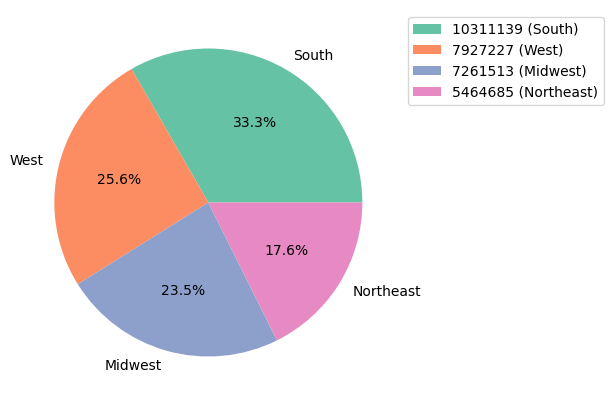

In [19]:
# Creating a pie chart to look at the total number of customers by region

# Define a color palette with 7 different colors

colors = sns.color_palette("Set2", 4)

# Create the pie chart

fig, ax = plt.subplots(figsize=(8, 5))
region_counts = df_merged2['region'].value_counts()
region_pie = ax.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', colors=colors)

# Add count labels to each slice

total_count = region_counts.sum()
counts = region_counts.values
count_labels = [f'{count} ({region})' for count, region in zip(counts, region_counts.index)]
ax.legend(labels=count_labels, bbox_to_anchor=(1, 1), loc='upper left')

# Save the pie chart as a JPG file

file_path = os.path.join(path, '04. Analysis', 'Visualizations',  'region_pie.png')
plt.savefig(file_path, format='png', dpi=300)

# Show the pie chart

plt.show()

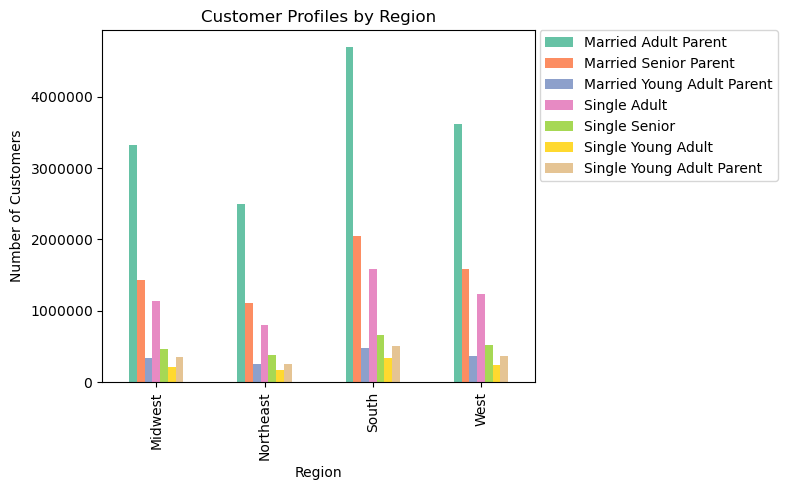

In [20]:
# Creating a bar chart of the customer profiles by region

# Define a color palette with 7 different colors

colors = sns.color_palette("Set2", 7)

# Creating a chart to better visualize the crosstab2

ax = crosstab2.transpose().plot.bar(figsize=(8, 5), color=colors)

# Add labels and title

ax.set_xlabel('Region')
ax.set_ylabel('Number of Customers')
ax.set_title('Customer Profiles by Region')

# Disable scientific notation

ax.yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

# Move the legend outside the plot

ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)

# Save the pie chart as a JPG file

file_path = os.path.join(path, '04. Analysis', 'Visualizations',  'customer_profile_region.png')
plt.savefig(file_path, format='png', dpi=300)

# Add tight layout options

plt.tight_layout() 

plt.savefig(file_path, format='png', dpi=300)

# Display the histogram

plt.show()

#### Based on the bar chart and the pie chart, we have a better understanding of our customer profiles by region. The South has the highest number of customers total, so it makes sense that they would have the highest number of each 'customer_profile'. At this level, it is hard to identify a definite trend amount the customer's profile and their region. Next, I'll be looking at department_id's to see if the different customer profiles tend to buy more or less of certain products. 

In [21]:
# First, we need to import our department_id data dictionary

df_department = pd.read_csv(os.path.join(path, '02. Data', 'Prepared Data', 'departments_wrangled.csv'))

In [22]:
df_department

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [23]:
# rename column to an appropriate name

df_department.rename(columns={'Unnamed: 0': 'department_id'}, inplace=True)

In [24]:
df_department.head(5)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [25]:
df_merged2[['department_id','order_id']].head()

,department_id,order_id
0,7,2543867
1,7,1285508
2,7,2578584
3,16,423547
4,16,2524893


In [26]:
# Creating a 30% sample of the data in order to run the remaining functions and answer questions

np.random.seed(4)
dev = np.random.rand(len(df_merged2)) <= 0.7

In [27]:
# Assigning the randomized values to a new subset 

df_merged_small = df_merged2[~dev]

In [28]:
# Checking the shape of the new subset

df_merged_small.shape

(9288468, 34)

In [29]:
# Merging the department dataframe with our smaller subset to include the department names

df_merged3 = df_merged_small.merge(df_department, how = 'left', on = 'department_id')

In [30]:
df_merged3.head()

,user_id,sex,state,age,date_joined,n_dependants,fam_status,income,order_id,eval_set,...,mean_spend,spend_flag,median_days_since,order_behavior_flag,_merge,region,customer_activity,customer_profile,income_profile,department
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,prior,...,7.99,Low spender,19.00,Regular customer,both,Midwest,High-activity,Married Adult Parent,High Income,beverages
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,prior,...,7.99,Low spender,19.00,Regular customer,both,Midwest,High-activity,Married Adult Parent,High Income,beverages
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,prior,...,7.99,Low spender,19.00,Regular customer,both,Midwest,High-activity,Married Adult Parent,High Income,dairy eggs
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,2505178,prior,...,7.99,Low spender,19.00,Regular customer,both,Midwest,High-activity,Married Adult Parent,High Income,dairy eggs
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,prior,...,7.99,Low spender,19.00,Regular customer,both,Midwest,High-activity,Married Adult Parent,High Income,produce


In [31]:
# Creating a crosstab to compare the customer_profiles with the departments of goods purchased

crosstab3 = pd.crosstab(df_merged3['customer_profile'], df_merged3['department'], dropna = False)

crosstab3

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
customer_profile,,,,,,,,,,,,,,,,,,,,,
Married Adult Parent,19597,56564,153136,351706,91886,4558,138619,710273,137264,112271,...,96286,35119,92748,8831,4677,244526,58295,12511,1244276,379496
Married Senior Parent,8386,24091,66826,154291,39768,2055,60710,308539,60265,49162,...,42366,15385,40852,3947,2067,107001,24828,5542,543626,164877
Married Young Adult Parent,1877,5665,15588,35752,9599,455,13988,72131,13690,11756,...,9998,3592,9516,910,463,24297,5816,1303,124582,38741
Single Adult,7023,19388,52322,119207,31072,1465,46677,239116,47044,37612,...,31788,11802,30058,2870,1602,81551,19374,4103,419673,127193
Single Senior,2755,7822,21881,50671,12760,623,19403,101598,19349,15990,...,13463,4947,13329,1237,646,34744,8376,1990,179261,53959
Single Young Adult,1410,3893,10283,24042,6126,312,9340,47288,9229,7690,...,6333,2482,6165,623,336,16470,3927,874,84221,25573
Single Young Adult Parent,2498,5847,16043,35724,10095,498,14517,75103,14347,11768,...,10126,3697,9709,1012,564,25892,6001,1655,129291,39370


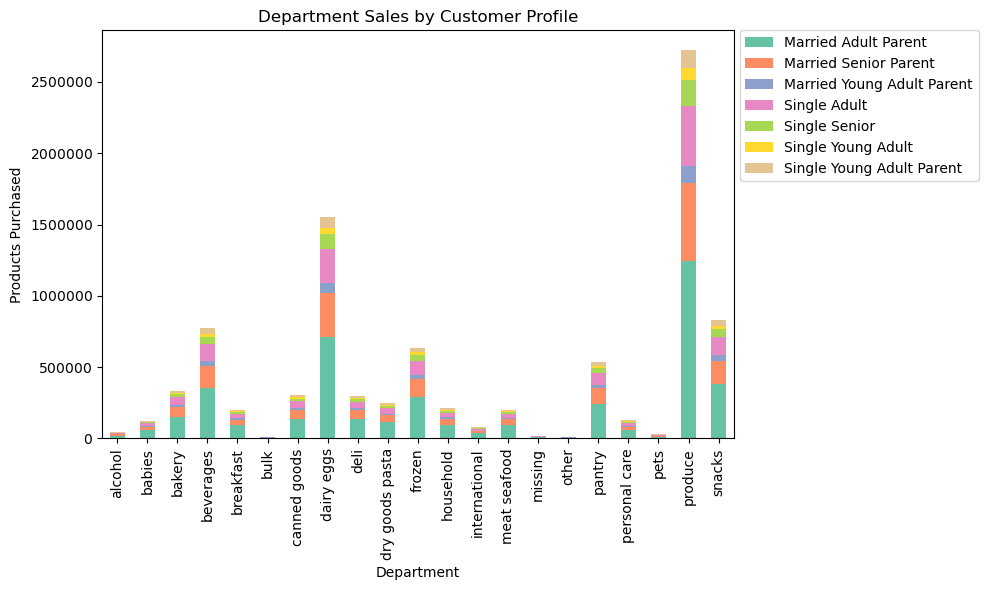

In [32]:
# Creating a bar chart to visualize the data

# Define a color palette with 7 different colors

colors = sns.color_palette("Set2", 7)

# Creating a chart to better visualize the crosstab2

fig, ax = plt.subplots(figsize=(10, 6))

crosstab3.transpose().plot.bar(stacked=True, ax=ax, color=colors)

# Add labels and title

ax.set_xlabel('Department')
ax.set_ylabel('Products Purchased')
ax.set_title('Department Sales by Customer Profile')

# Disable scientific notation

ax.yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

# Move the legend outside the plot

ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)

# Save the chart as a JPG file

file_path = os.path.join(path, '04. Analysis', 'Visualizations',  'customer_profile_department.png')

# Add tight layout options

plt.tight_layout()  

plt.savefig(file_path, format='png', dpi=300)

# Display the chart
plt.show()

In [33]:
# Creating another crosstab to look at just a select few customer profiles

# Filter the dataframe to only look at one type of customer_profile

filtered_df = df_merged3.loc[df_merged3['customer_profile'].isin(
        ['Married Adult Parent', 'Married Senior Parent' , 'Married Young Adult Parent', 'Single Young Adult Parent'])]

# Perform the cross-tabulation

crosstab4 = pd.crosstab(filtered_df['customer_profile'], filtered_df['department'], dropna=False)

In [34]:
crosstab4

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
customer_profile,,,,,,,,,,,,,,,,,,,,,
Married Adult Parent,19597,56564,153136,351706,91886,4558,138619,710273,137264,112271,...,96286,35119,92748,8831,4677,244526,58295,12511,1244276,379496
Married Senior Parent,8386,24091,66826,154291,39768,2055,60710,308539,60265,49162,...,42366,15385,40852,3947,2067,107001,24828,5542,543626,164877
Married Young Adult Parent,1877,5665,15588,35752,9599,455,13988,72131,13690,11756,...,9998,3592,9516,910,463,24297,5816,1303,124582,38741
Single Young Adult Parent,2498,5847,16043,35724,10095,498,14517,75103,14347,11768,...,10126,3697,9709,1012,564,25892,6001,1655,129291,39370


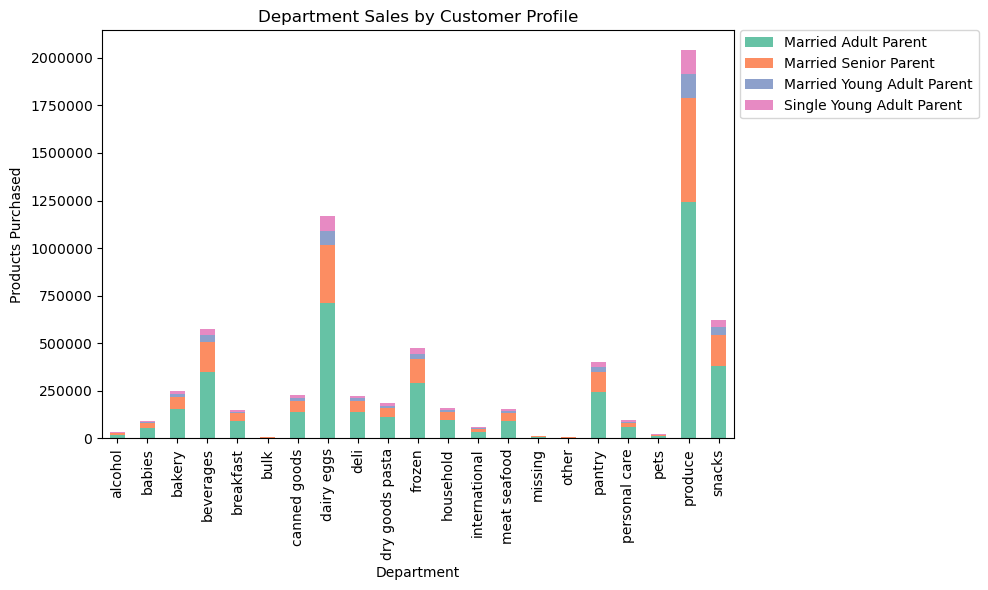

In [35]:
# Creating a graph for the new crosstab looking at all the types of 'Parents'.

fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed

crosstab4.transpose().plot.bar(stacked=True, ax=ax, color=colors)

# Add labels and title

ax.set_xlabel('Department')
ax.set_ylabel('Products Purchased')
ax.set_title('Department Sales by Customer Profile')

# Disable scientific notation

ax.yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

# Move the legend outside the plot

ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)

# Save the chart as a JPG file

file_path = os.path.join(path, '04. Analysis', 'Visualizations',  'customer_profile_adult_department.png')

# Add tight layout options

plt.tight_layout() 

plt.savefig(file_path, format='png', dpi=300)

# Display the chart

plt.show()

#### Based on the graphs that I chose to creat, we can see quite a difference in the types of products that certain customer profiles purchase. I decided to drill down a little more on all the 'Parent' profiles. The results were quite interesting. We can see that Married Adult Parents tend to buy more produce and dairy/egg products. This would make sense as these types of families are often making dinners at home with fresh ingredents. Our analysis could continue on at this level of detail for each customer profile and we would find some very insightful results. 

In [36]:
# Exporting the final dataset 

df_merged3.to_pickle(os.path.join(path, '02. Data','Prepared Data', 'customer_profile_small.pkl'))

MemoryError: 

In [ ]:
# Creating a histogram to view the most popular products ordered

# Assuming you have a pandas DataFrame called 'df' with a column named 'department'
department_counts = df_merged3['department'].value_counts()

# Create a histogram
plt.bar(department_counts.index, department_counts.values, color = 'teal')

# Set labels and title
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Most Popular Products Ordered')

# Rotate x-axis labels if needed
plt.xticks(rotation=75)

# Format y-axis labels as whole numbers
plt.ticklabel_format(style='plain', axis='y')

# Save the chart as a JPG file
file_path = os.path.join(path, '04. Analysis', 'Visualizations',  'most_popular_products.png')

# Add tight layout options
plt.tight_layout() 

plt.savefig(file_path, format='png', dpi=300)

# Display the histogram
plt.show()

In [ ]:
# Creating a graph for region / department orders using a crosstab

crosstab5 = pd.crosstab(df_merged3['department'], df_merged3['region'], dropna = False)

In [ ]:
crosstab